In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 단순 선형 회귀 분석

sns.get_dataset_names()

# 1. 문제 정의
# 우리가 분석할 것은 각 칼럼과 연비의 관계
# 모델을 학습시켜서 연비를 예측한다.

# 2. 데이터 수집
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

# mpg : 연비
# cylinders : 실린더 수
# displacement : 엔진 배기량
# horsepower : 마력
# weight : 차의 무게
# acceleration : 가속력
# model_year : 모델 제조 연도
# origin : 출시 국가
# name : 자동차 모델명

# 3. 데이터 전처리

df_mpg.info()

df_mpg.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
# 결측치 확인
df_mpg.isna().sum()

s_isna = df_mpg['horsepower'].isna()
s_isna

# 결측치 행만 조회
df_mpg[s_isna]

df_mpg.dropna(subset=['horsepower'], inplace=True)
df_mpg.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
df_mpg.head()

df_data = df_mpg.loc[:, 'mpg':'acceleration']

df_data


,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


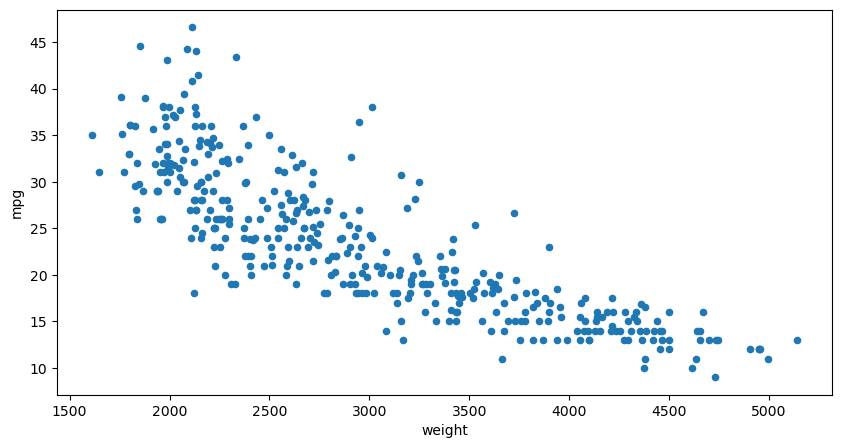

In [6]:
# 데이터들의 관계를 분석할 때 산점도 그래프를 활용하면 한 눈에 파악하기 좋다.
# 특히 회귀분석에서 산점도 그래프를 자주 사용한다.
fig, ax = plt.subplots(1,1, figsize=(10,5))
df_data.plot.scatter(x='weight', y='mpg', ax=ax)

plt.show()

# 산점도 그래프를 볼 때 각데이터를 표현하는 점들이 하나의 선 모양에 가깝다면
# 두 칼럼(변수) 간에 강한 선형 관계를 가지는 것이다.(패턴이 있다는 의미)
# 점이 퍼져있을 수록 (선의 형태가 아닐수록) 두 변수는 관계가 없다.
# 선의 형태에서 특정 데이터들이 크게 벗어나 있다면 해당 데이터를 이상치로 판단할 수 있다.

# 현재 무게와 연비는 어느정도 선의 형태를 띄고 있으며, 선의 방향이 좌상 -> 좌하 방향으로 나타나고 있다.
# 이는 음의 관계 (한 변수의 값이 증가하면 다른 변수의 값은 감소)를 의미한다.

# 이렇게 선형적인 관계가 관찰되었다면 이 두 변수는 선형 회귀 분석 모델에 사용할 수 있다는 의미이다.
# 즉, 우리는 이 산점도 그래프를 통해 모델에 학습시킬 칼럼(피처, 속성)을 선정하는 것이다.
# 여기서 X:독립변수(원인)은 무게, y:종속변수(결과)는 연비이다.

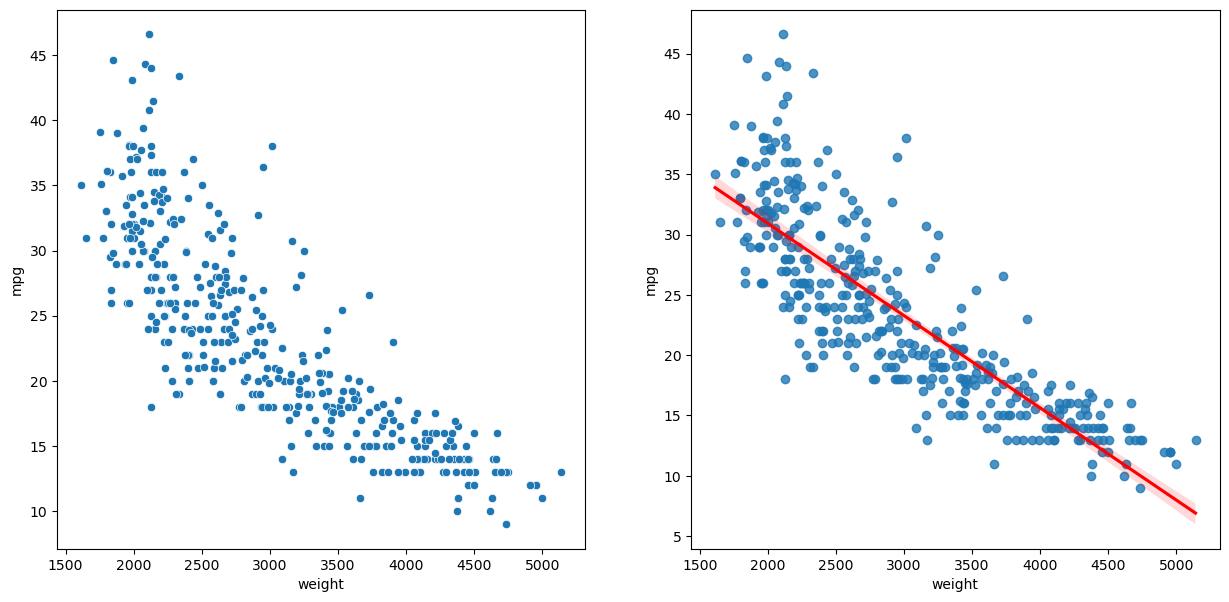

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))

# 기본적인 산점도 차트 생성
sns.scatterplot(data=df_data, x='weight', y='mpg', ax=ax[0])
# regplot() : 회귀선을 포함한 산점도 차트 생성
sns.regplot(data=df_data, x='weight', y='mpg', ax=ax[1], line_kws={'color':'red'})

plt.show()

# 회귀선이란?
# 선형 회귀 분석에서 중요한 개념
# 단순 선형 회귀는 두 변수의 관계를 가장 잘 나타내는 직선을 찾는것이 목표이다. 이 선을 회귀선이라고 한다.
# 회귀선은 산점도 그래프 위에 그려지고 두 변수와의 관계를 시각적으로 보여주기 위해 사용한다.
# 회귀선과 데이터(점)의 거리를 잔차라고 이야기 하며, 이 잔차가 클 수록 두 변수의 관계가 부정확하며
# 잔차가 작아 점들이 회귀선에 가까울 수록 두 변수는 서로 관계가 크다고 할 수 있다.

# y = w * x + b
# y : 종속변수(결과), 연비
# x : 독립변수(원인), 무게

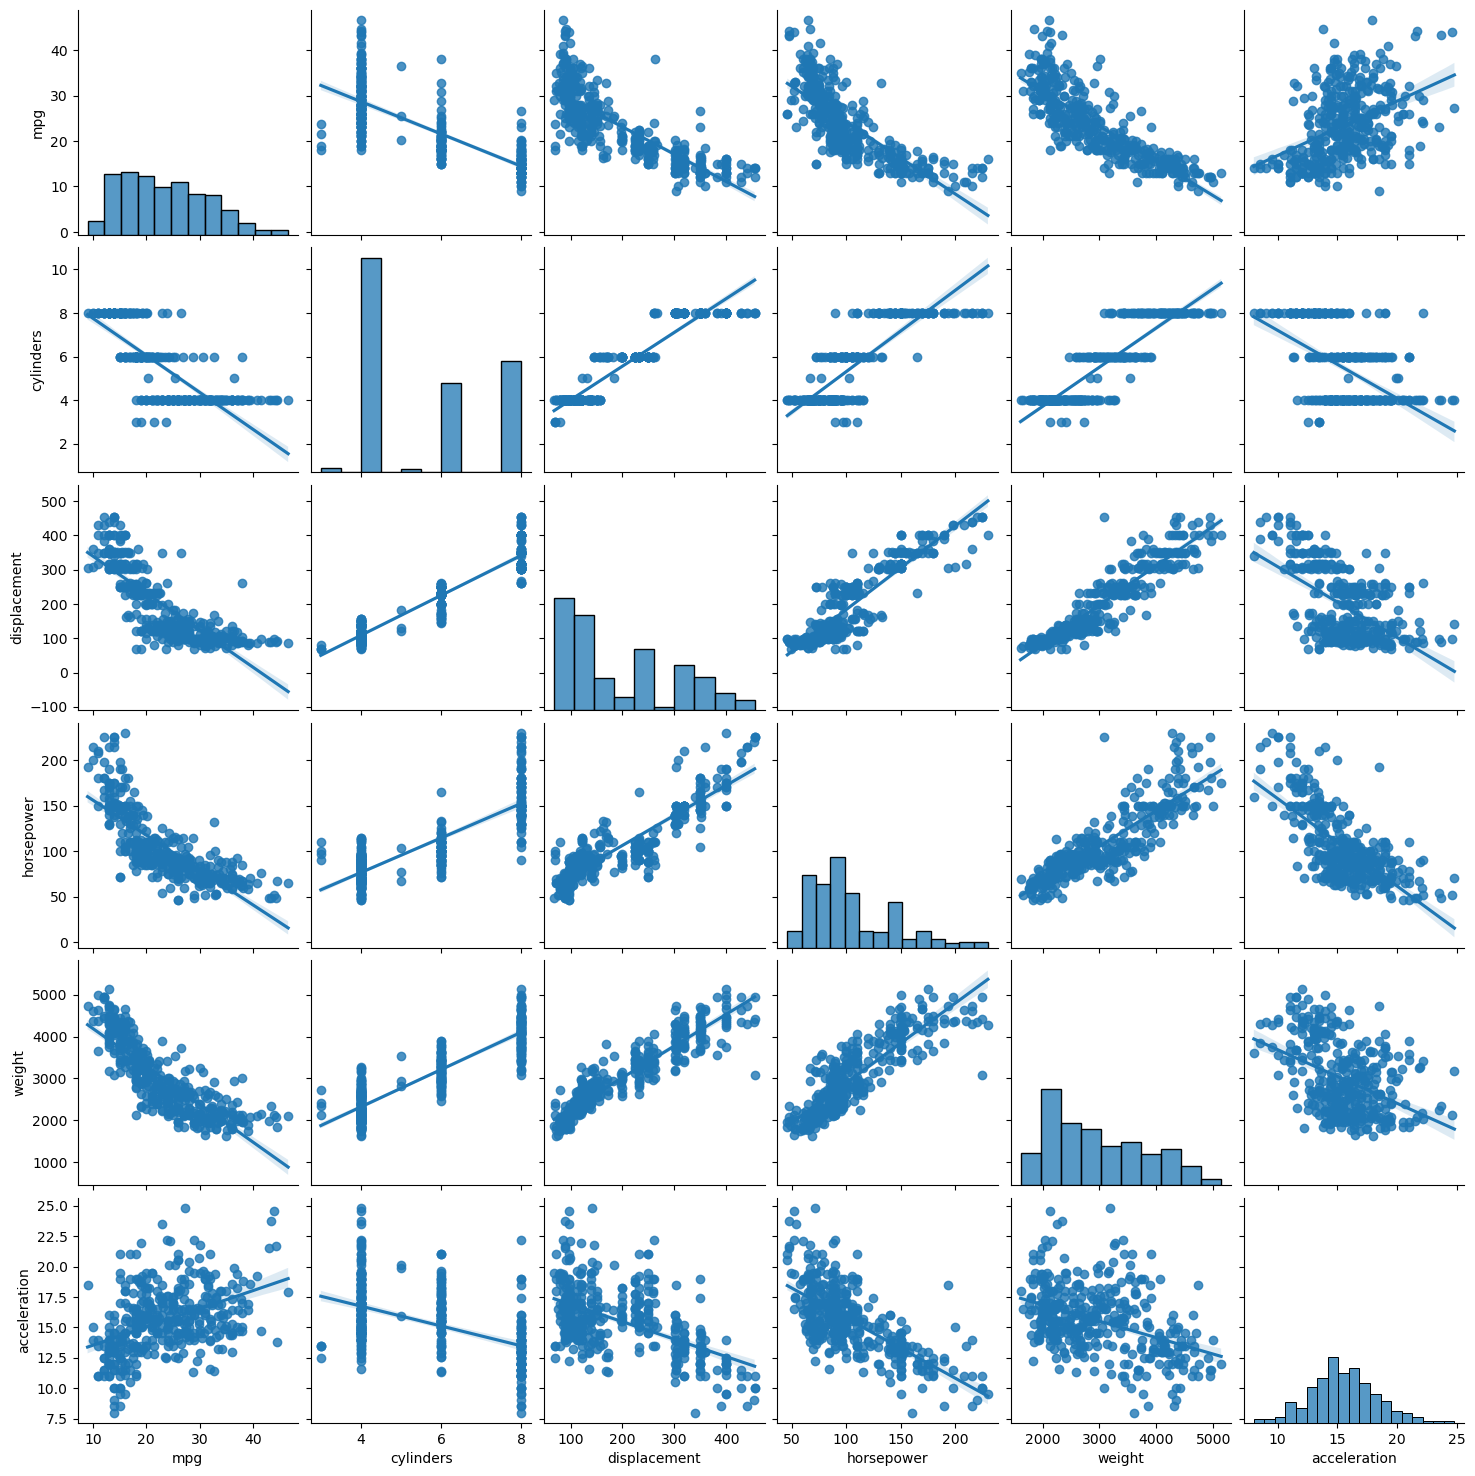

In [8]:
# 이렇게 각 칼럼들이 연비와 얼마나 관련성이 있는지 한 눈에 파악하기위해 시각화를 진행하는데
# 경우의 수가 너무 많다.
# 이경우 seaborn의 pairplot()을 활용하면 모든 경우의 수에 대한 관계를 한 번에 볼 수 있다.

# pairplot()은 데이터 프레임의 각 칼럼별 관계를 모두 산점도로 보여주며,
# 자기 자신과의 관계는 히스토그램으로 데이터 분포를 보여준다.
# sns.pairplot(data=df_data)

sns.pairplot(data=df_data, kind='reg')

In [9]:

# 변수 선택과 분리

# 우리가 산점도 차트를 통해 배기량, 마력, 무게가 연비와 관계성이 어느정도 있다는 것을 파악했다.
# 종속변수를 연비로 사용했을 때 독립변수에 배기량, 마력, 무게를 선택할 수 있다는 힌트를 얻은 것이다.

# 종속변수 선택과 분리
y = df_data['mpg']

y

# 독립변수 선택과 분리
X_displacement = df_data[['displacement']]
X_horsepower = df_data[['horsepower']]
X_weight = df_data[['weight']]

X_weight

,weight
0,3504
1,3693
2,3436
3,3433
4,3449
...,...
393,2790
394,2130
395,2295
396,2625


In [10]:
# 사이킷런 설치
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# 훈련 데이터와 검증 데이터를 분할

# 전체 데이터를 100이라고 가정했을 때 
# 훈련 데이터를 70~80, 검증 데이터를 20~30으로 사용하는게 일반적이다.

# 데이터를 분리하는데 특화된 라이브러리 도움을 받는다.

# 사이킷런 라이브러리
# 파이썬 머신러닝의 기본이라고 볼 수 있는 라이브러리
# 다양한 모델과 알고리즘을 표준화된 인터페이스로 제공한다.
# 제공되는 모델과 알고리즘을 편하게 사용하여 모델을 학습시킬 수 있다.

from sklearn.model_selection import train_test_split

# 함수가 반환하는 값의 순서는 항상 동일하므로 변수의 순서를 변경하면 안된다.
X_train, X_test, y_train, y_test = train_test_split(
  X_displacement, # 독립변수
  y,              # 종속변수
  test_size=0.3,  # 검증용 데이터의 비율(30%)
  random_state=10
  )

# random_state 속성
# train_test_split()은 훈련/검증 데이터를 랜덤하게 분리해준다.
# 우리는 머신러닝을 통해 올바른 모델을 만들어야한다.
# 그렇다면 많은 시행착오를 격을 수 밖에 없다.(반복적인 테스트가 필수이다.)
# 그런데 테스트를 할 때마다 검증 데이터와 훈련 데이터가 계속 변경된다면
# 올바른 모델을 만드는데 방해가 될 것이다.
# random_state는 이러한 문제점을 방지하는 속성이다.
# 해당 속성에 같은 숫자를 설정하면 항상 동일한 훈련/검증 데이터를 반환한다.

len(X_train)
len(X_test)

118

In [12]:
# 모델 학습과 검증

# 선형 회귀 분석용 모듈 임포트
from sklearn.linear_model import LinearRegression

# 기본 제공되는 모델 객체를 생성 및 저장
model = LinearRegression()

# 단순 선형 회귀 모델의 일반적인 예측 함수(단순 모델은 feature를 1개 가진다.)
# y = w * x + b
# y : 종속변수(결과), 연비
# x : 독립변수(원인), 무게/마력/배기량 중 1개
# 이 모델에 학습을 시키면 w(가중치 -> 기울기)와 b(편향 -> y절편)를 모델이 산정한다.


# 훈련용 데이터로 모델 학습
model.fit(X_train, y_train)

# 학습이 끝난 모델에 검증용 데이터를 넘겨주어 결과 확인
# 모델의 score()는 테스트 데이터로 검증하여 결정계수를 반환한다.
test_score = model.score(X_test, y_test)

test_score

# 결정 계수(R-squared)란?
# 회귀 모델의 성능을 평가하는 척도
# 0~1의 값으로 표현하며 1에 가까울 수록 연관이 있고 강한 선형관계임을 나타낸다.
# 즉, 1에 가까울 수록 해당 모델의 예측이 정확할 수 있다는 의미이다.

# 주의사항
# 1. 결정 계수가 높다고 무조건 좋은 것이 아니다.
# 너무 테스트 데이터에 적합한 모델을 만든 경우 해당 테스트에서는 결정계수가 높게 나올 수 있으나
# 새로운데이터의 정확도가 떨어질 수 있다.
# 예를 들어 너무 적은 데이터를 학습하여 단순하고 적은 패턴만 학습한 경우. 이런 현상을 과소적합(underfiting)이라고 한다.
# 반대로 많은 학습을 하여 모델이 복잡해져서 주어진 데이터에서만 예측을 잘하는 경우. 이런 현상을 과대적합(overfiting)이라고 한다.
# 우리가 만든 모델이 새로운 데이터를 예측할 때에도 정확히 예측하기 위해서는 과소적합, 과대적합을 피해야한다.
# 그렇게 새로운 데이터에서도 예측이 높다면 일반화(generalization)가 잘 되었다고 표현한다.

# 2. 결정 계수가 낮다고 무조건 나쁜 것이 아니다.
# 해당 데이터가 단순하지 않고 복잡한 관계를 가지는 경우
# 예를 들면 결과의 이유가 너무 많아서 설명이 힘든 경우에는 1가지 독립변수만 테스트하는
# 단순 선형 회귀 분석에서 낮은 결정 계수가 나올 수 밖에 없다.


0.6460159729950312

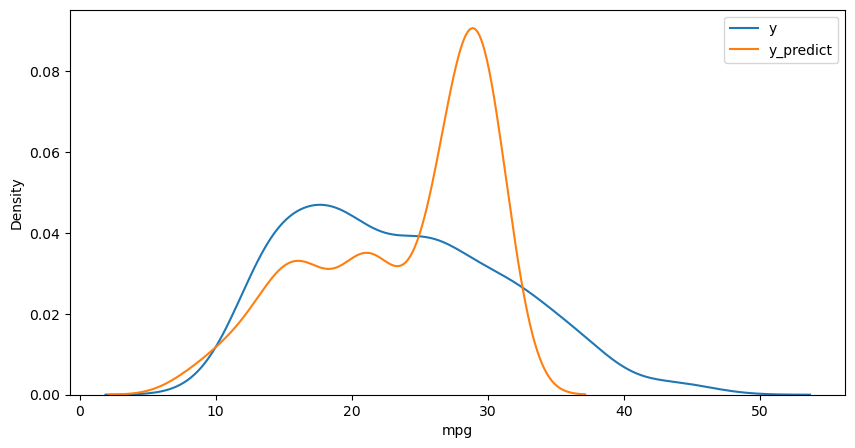

In [13]:
# 훈련한 모델로 예측한 결과와 실제 데이터 비교하기

# predict()는 독립변수를 받아 종속변수를 예측한다.
y_predict = model.predict(X_displacement)
# y_predict는 예측 결과이다.

fig, ax = plt.subplots(1,1, figsize=(10,5))

# kdeplot()
# 데이터 집합의 분포를 곡선 그래프로 볼 수 있다.
sns.kdeplot(data=y, label='y', ax=ax)
sns.kdeplot(data=y_predict, label='y_predict', ax=ax)

# 범례 추가
ax.legend()

plt.show()

# 결과가 너무 일치하지 않는다.
# 크게 2가지 이유가 있다.

# 1. 과연 선형 관계가 맞는가?
# 산점도의 데이터 분포를 확인해보면 직선보다는 곡선에 가깝다는 것을 알 수 있다.
# 이경우 단순 선형회귀 분석 보다는 다항 회귀 분석이 적합할 수 있다.
# 2. 연비 영향을 주는 독립변수가 1개인가?


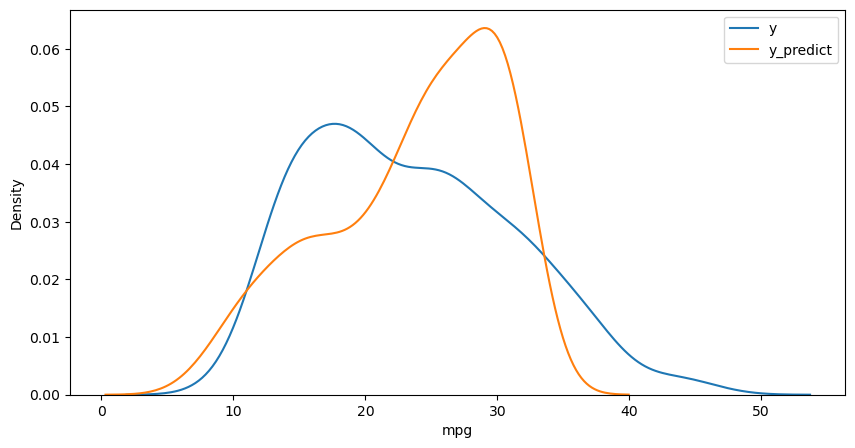

In [14]:
# 이번에는 여러 변수를 이용하여 학습을 진행해보자. (다중 회귀 분석)
# 다중 회귀 모델의 방정식(피처를 여러개 가진다.)
# y = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + ..... + b

# 독립변수 선택/분리
X_datas = df_data[['displacement', 'horsepower', 'weight']]

X_train, X_test, y_train, y_test = train_test_split(X_datas, y, test_size=0.3, random_state=10)

model = LinearRegression()

model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
test_score
# 기존 독립변수 1개만 활용한 모델은 0.64
# 독립변수 3개를 활용한 모델은 0.69

y_predict = model.predict(X_datas)

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.kdeplot(data=y, label='y', ax=ax)
sns.kdeplot(data=y_predict, label='y_predict', ax=ax)

ax.legend()
plt.show()


0.7087009262975685


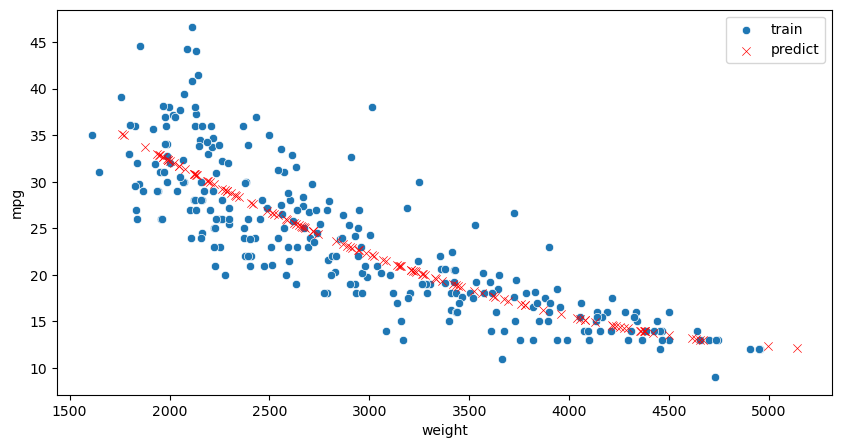

In [36]:
# 다항 회귀분석은 곡선의 형태로 회귀선을 만들 수 있다.
# 다항 회귀분석도 선형 회귀를 확장한것이기 때문에 동일한 모델을 사용한다.

from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

df_data.isna().sum()

X_data = df_data[['weight']]
y_data = df_data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=10)

poly = PolynomialFeatures(degree=2) # 2차항을 사용하는 poly객체 생성
# 학습용 데이터를 2차항 회귀 분석에 맞게 변형해준다.
# y = w[0] + w[1] * x + w[2] * x^2 + b
# y = w[0] * x^0 + w[1] * x^1 + w[2] * x^2 + b
X_train_poly = poly.fit_transform(X_train)

# 학습모델을 이용하여 학습을 시킨다.
model = LinearRegression()

model.fit(X_train_poly, y_train)

# 테스트용 데이터도 2차항으로 변경
X_test_poly = poly.fit_transform(X_test)

# 테스트 스코어 확인
test_score = model.score(X_test_poly, y_test)

print(test_score)

# 회귀선 확인해보기

y_predict = model.predict(X_test_poly)

y_predict

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x=X_train['weight'], y=y_train, ax=ax, label='train')
sns.scatterplot(x=X_test['weight'], y=y_predict.ravel(), ax=ax, label='predict', color='red', marker='x')

plt.show()


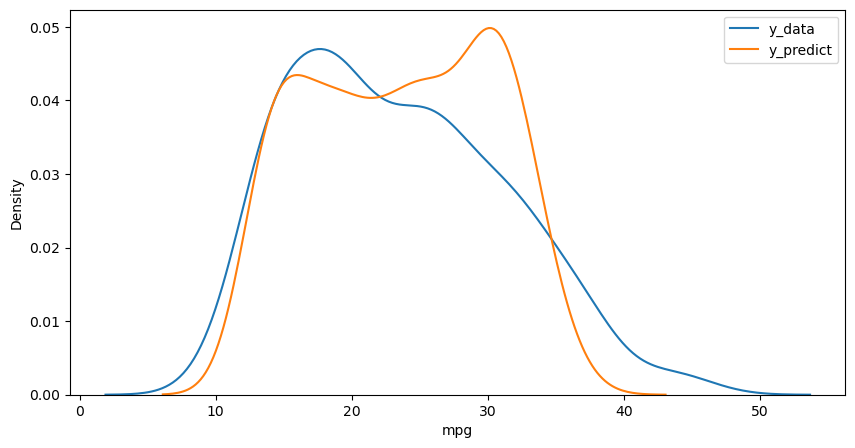

In [37]:
# KDE차트로 전체적인 정확도를 확인한다.

X_poly = poly.fit_transform(X_data)
y_predict = model.predict(X_poly)

fig, ax = plt.subplots(1,1, figsize=(10, 5))

sns.kdeplot(data=y_data, label='y_data', ax=ax)
sns.kdeplot(data=y_predict, label='y_predict', ax=ax)
# y_data

plt.legend()

plt.show()

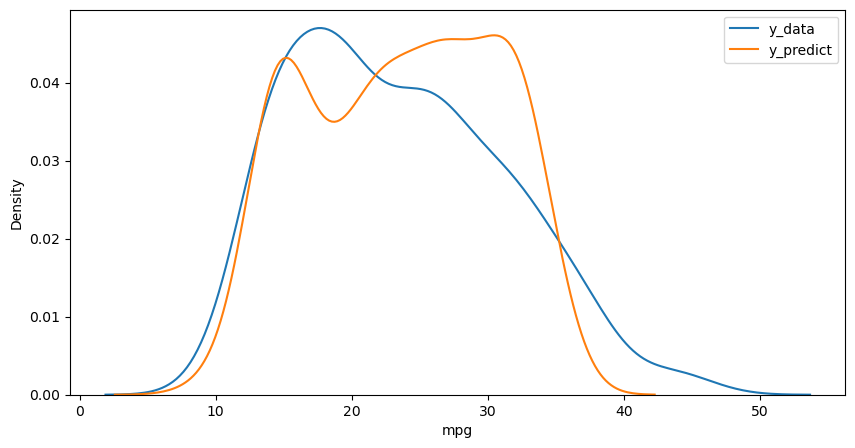

In [40]:
# 여러 독립변수를 활용한 곡선 관계를 분석해보자 (다중 다항 회귀 분석)

X_datas

poly = PolynomialFeatures(degree=2)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_datas, y_data, test_size=0.3, random_state=10)

X_train_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)

test_score = model.score(X_test_poly, y_test)
test_score

X_poly = poly.fit_transform(X_datas)
y_predict = model.predict(X_poly)

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.kdeplot(data=y_data, label='y_data', ax=ax)
sns.kdeplot(data=y_predict, label='y_predict', ax=ax)

plt.legend()

plt.show()
